In [1]:
#From the console, run the following
#pip install numpy
#pip install scipy
#pip install scikit-learn
#pip install matplotlib

# Import required packages here (after they are installed)
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as mp
from pylab import show
from sklearn.model_selection import cross_val_score

# Load data. csv file should be in the same folder as the notebook for this to work, otherwise
# give data path.
data = np.loadtxt("data.csv")

In [2]:
#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)


features = []
digits = []


for row in data:
    #import the data and select only the 1's and 5's
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))

        
#Select the proportion of data to use for training. 
#Notice that we have set aside 80% of the data for testing
numTrain = int(len(features)*.2)

trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

#print(trainFeatures)
#trainFeatures[0]

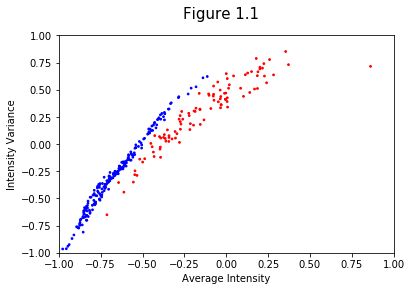

In [3]:
#Convert the 256D data (trainFeatures) to 2D data
#We need X and Y for plotting and simpleTrain for building the model.
#They contain the same points in a different arrangement

X = []
Y = []
simpleTrain = []

#Colors will be passed to the graphing library to color the points.
#1's are blue: "b" and 5's are red: "r"
colors = []
#legends = []
for index in range(len(trainFeatures)):
    #print(index)
    #break
    #produce the 2D dataset for graphing/training and scale the data so it is in the [-1,1] square
    xNew = 2*np.average(trainFeatures[index])+.75 
    yNew = 3*np.var(trainFeatures[index])-1.5
    X.append(xNew)
    Y.append(yNew)
    simpleTrain.append([xNew,yNew])
    #trainDigits will still be the value we try to classify. Here it is the string "1.0" or "5.0"
    if(trainDigits[index]=="1.0"):
        colors.append("b")
        #legends.append("1")
    else:
        colors.append("r")
        #legends.append("5")

#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#specify the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Labeling the plot
#mp.legend(['1'])
#mp.legend(legends)
fig.suptitle('Figure 1.1', fontsize=15)

#display the current graph
show()

In [4]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = KNeighborsClassifier(n_neighbors=1)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

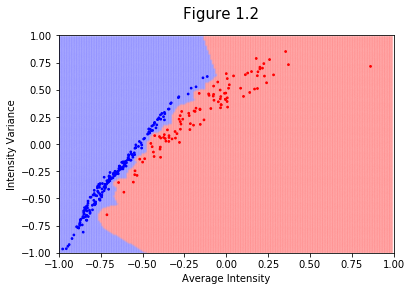

In [97]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Figure 1.2', fontsize=15)
show()

3a) This model suffers from overfitting (K=1). It is just considering each point as a correct classification itself. And as the accuracy is 100% for the training data and there is no misclassification, it is overfitting.

3b) Accuracy might decrease. Since we are converting the 256 features to 2 features, some important features can be compromised. The variance in the data might also decrease, so accuracy might decrease.

K-FOLD CROSS VALIDATION

Euclidean distance - 2 dimensions

In [98]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

#train model with cv of 10 
cv_errors = []
cv_scores = cross_val_score(knn_cv, simpleTrain, trainDigits, cv=10)

for score in cv_scores:
    error = 1-score
    cv_errors.append(error)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print(cv_errors)
model1_err = np.mean(cv_errors)
print('Cross validation error:', model1_err)

[1.         1.         1.         1.         0.96774194 1.
 1.         1.         1.         0.96666667]
cv_scores mean:0.9934408602150538
[0.0, 0.0, 0.0, 0.0, 0.032258064516129004, 0.0, 0.0, 0.0, 0.0, 0.033333333333333326]
Cross validation error: 0.006559139784946233


Manhattan distance - 2 dimensions

In [99]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

#train model with cv of 10 
cv_errors = []
cv_scores = cross_val_score(knn_cv, simpleTrain, trainDigits, cv=10)

for score in cv_scores:
    error = 1-score
    cv_errors.append(error)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print(cv_errors)
model2_err = np.mean(cv_errors)
print('Cross validation error:', model2_err)

[1.         1.         1.         1.         0.96774194 1.
 1.         1.         1.         0.93333333]
cv_scores mean:0.9901075268817205
[0.0, 0.0, 0.0, 0.0, 0.032258064516129004, 0.0, 0.0, 0.0, 0.0, 0.06666666666666665]
Cross validation error: 0.009892473118279566


Chebyshev distance - 2 dimensions

In [100]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')

#train model with cv of 10 
cv_errors = []
cv_scores = cross_val_score(knn_cv, simpleTrain, trainDigits, cv=10)

for score in cv_scores:
    error = 1-score
    cv_errors.append(error)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print(cv_errors)
model3_err = np.mean(cv_errors)
print('Cross validation error:', model3_err)

[1.         1.         1.         0.96774194 0.96774194 1.
 1.         1.         1.         0.96666667]
cv_scores mean:0.9902150537634409
[0.0, 0.0, 0.0, 0.032258064516129004, 0.032258064516129004, 0.0, 0.0, 0.0, 0.0, 0.033333333333333326]
Cross validation error: 0.009784946236559133


Euclidean distance - 2 dimensions (Full K-fold cross validation)

In [101]:
# scikit-learn k-fold cross-validation
from numpy import array
import pandas as pd
from sklearn.model_selection import KFold

#prepare cross validation
kfold = KFold(n_splits = 10, shuffle = True)

# Declare Model
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

#Perform training repeatedly on each k-1 folds (x_train, y_train) and use the Kth fold (x_test, y_test) for testing.
scores = []
simpleTrain1 = pd.DataFrame(simpleTrain)
trainDigits1 = pd.DataFrame(trainDigits)
for i in range(10):
    result = next(kfold.split(simpleTrain1), None)
    #print(result)
    x_train = simpleTrain1.iloc[result[0]]
    x_test = simpleTrain1.iloc[result[1]]
    y_train = trainDigits1.iloc[result[0]]
    y_test = trainDigits1.iloc[result[1]]
    model = model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores for each iteration:', scores)
print('Average K-fold score:', np.mean(scores))


C:\Users\Anu\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Anu\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Anu\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Anu\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Anu\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DataConversionWarning: A column-vector y 

Scores for each iteration: [0.90625, 0.96875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average K-fold score: 0.9875


Euclidean distance - 256 dimensions

In [102]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

#train model with cv of 10 
cv_errors = []
cv_scores = cross_val_score(knn_cv, trainFeatures, trainDigits, cv=10)

for score in cv_scores:
    error = 1-score
    cv_errors.append(error)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print(cv_errors)
model4_err = np.mean(cv_errors)
print('Cross validation error:', model4_err)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.96666667]
cv_scores mean:0.9966666666666667
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.033333333333333326]
Cross validation error: 0.0033333333333333327


Manhattan distance - 256 dimensions

In [103]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

#train model with cv of 10
cv_errors = []
cv_scores = cross_val_score(knn_cv, trainFeatures, trainDigits, cv=10)

for score in cv_scores:
    error = 1-score
    cv_errors.append(error)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print(cv_errors)
model5_err = np.mean(cv_errors)
print('Cross validation error:', model5_err)

[1.         1.         1.         1.         1.         1.
 0.96774194 1.         1.         0.96666667]
cv_scores mean:0.9934408602150538
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.032258064516129004, 0.0, 0.0, 0.033333333333333326]
Cross validation error: 0.006559139784946233


Chebyshev distance - 256 dimensions

In [104]:
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')

#train model with cv of 10 
cv_errors = []
cv_scores = cross_val_score(knn_cv, trainFeatures, trainDigits, cv=10)

for score in cv_scores:
    error = 1-score
    cv_errors.append(error)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))
print(cv_errors)
model6_err = np.mean(cv_errors)
print('Cross validation error:', model6_err)

[0.78125    0.96875    0.90625    0.87096774 0.87096774 0.90322581
 0.93548387 0.93548387 0.96774194 0.86666667]
cv_scores mean:0.9006787634408603
[0.21875, 0.03125, 0.09375, 0.12903225806451613, 0.12903225806451613, 0.09677419354838712, 0.06451612903225812, 0.06451612903225812, 0.032258064516129004, 0.1333333333333333]
Cross validation error: 0.0993212365591398


3c) The cross validation error is low in 256 dimensional data for euclidean and manhattan distance than in 2 dimensional data. But for chebyshev distance comparitively, the error is very huge in 256D data than 2D data. However, in both 2D data & 256D data, euclidean stands the best as it's error rate is lower than other distance metrics. This is might be because, euclidean is good distance metric when trying to predict the nearby pixels characteristics.

4) K-NEAREST NEIGHBOURS GRAPH - ODD VALUES OF K (1-49) - 2 Dimensions

In [105]:
#create a new KNN model

start, end = 1, 49
  
knn_models = []
cv_scores_list = []
k_values = []
cv_errors = []
# iterating each number in list 
for num in range(start, end + 1): 
    # checking condition 
    if num % 2 != 0: 
        knn_cv = KNeighborsClassifier(n_neighbors=num)
        #print(knn_cv)
        knn_models.append(knn_cv)

#train model with cv of 10 
cv_errors = []

for knn in knn_models:
    cv_scores = cross_val_score(knn, simpleTrain, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

'''for score in cv_scores:
    error = 1-score
    cv_errors.append(error)'''

#print each cv score (accuracy) and average them
for i in range(len(knn_models)):
    k = i*2+1
    k_values.append(k)
    print('k:', k)
    print(knn_models[i])
    print(cv_scores_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    error = 1-np.mean(cv_scores_list[i])
    cv_errors.append(error)
    print('Cross validation error:', error)

k: 1
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
[1.         1.         1.         1.         0.96774194 1.
 1.         1.         1.         0.96666667]
cv_scores mean:0.9934408602150538
Cross validation error: 0.006559139784946155
k: 3
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
[1.         1.         1.         1.         0.93548387 0.96774194
 1.         1.         1.         0.93333333]
cv_scores mean:0.9836559139784946
Cross validation error: 0.01634408602150539
k: 5
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[1.         1.         0.96875    0.96774194 0.90

GRAPH - 2 Dimensions

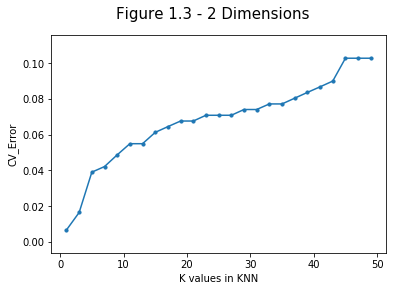

In [106]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(k_values,cv_errors,s=10)
mp.plot(k_values,cv_errors)

#specify the axes
mp.xlabel("K values in KNN")
mp.ylabel("CV_Error")

#Labeling the plot
#mp.legend(['1'])
#mp.legend(legends)
fig.suptitle('Figure 1.3 - 2 Dimensions', fontsize=15)

#display the current graph
show()

4a) The values of K which yeilds the best results are k = 1 as the cross validation error is the lowest (2D data).

4) K-NEAREST NEIGHBOURS GRAPH - ODD VALUES OF K (1-49) - 256 Dimensions

In [107]:
#create a new KNN model

start, end = 1, 49
  
knn_models = []
cv_scores_list = []
k_values = []
cv_errors = []
cv_errors_list = []
cv_errors_mean = []

# iterating each number in list 
for num in range(start, end + 1): 
    # checking condition 
    if num % 2 != 0: 
        knn_cv = KNeighborsClassifier(n_neighbors=num)
        #print(knn_cv)
        knn_models.append(knn_cv)

        
for knn in knn_models:
    cv_scores = cross_val_score(knn, trainFeatures, trainDigits, cv=10)
    cv_scores_list.append(cv_scores)

    for score in cv_scores:
        #print(score)
        error = 1-score
        cv_errors.append(error)
    #print(cv_errors)
    cv_errors_list.append(array(cv_errors))
    #print ("Error list:", cv_errors_list)
    cv_errors.clear()
    
#print ("Scores:", cv_scores_list)
#print ("Errors:", cv_errors_list)

#print each cv score (accuracy) and average them
for i in range(len(knn_models)):
    k = i*2+1
    k_values.append(k)
    print('k:', k)
    print(knn_models[i])
    print(cv_scores_list[i])
    print(cv_errors_list[i])
    print('cv_scores mean:{}'.format(np.mean(cv_scores_list[i])))
    #error = 1-np.mean(cv_scores_list[i])
    #cv_errors.append(error)
    #print('Cross validation error:', error)
    cv_errors_mean.append(np.mean(cv_errors_list[i]))
    print('Cross validation error mean:{}'.format(np.mean(cv_errors_list[i])))
    
print(cv_errors_mean)

k: 1
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.96666667]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03333333]
cv_scores mean:0.9966666666666667
Cross validation error mean:0.0033333333333333327
k: 3
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.96666667]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03333333]
cv_scores mean:0.9966666666666667
Cross validation error mean:0.0033333333333333327
k: 5
KNeighborsClassifier(al

As k increases, accuracy decreases and hence error increases

GRAPH

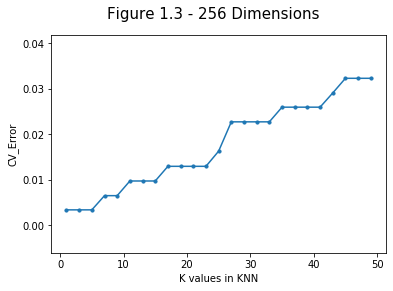

In [108]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(k_values,cv_errors_mean,s=10)
mp.plot(k_values,cv_errors_mean)

#specify the axes
mp.xlabel("K values in KNN")
mp.ylabel("CV_Error")

#Labeling the plot
#mp.legend(['1'])
#mp.legend(legends)
fig.suptitle('Figure 1.3 - 256 Dimensions', fontsize=15)

#display the current graph
show()

4a) The values of K which yeilds the best results are k = 1,3,5 as the cross validation error is the lowest (256D data).

2-DIMENSIONAL SPACE FOR OPTIMAL VALUE OF K (K=5)

In [109]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = KNeighborsClassifier(n_neighbors=5)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

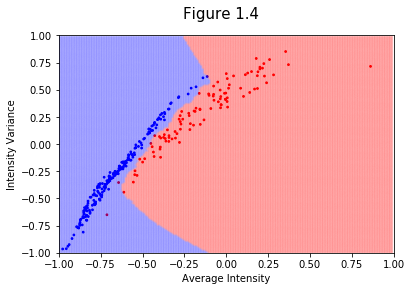

In [110]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Figure 1.4', fontsize=15)
show()

4b) This model with k=5 suffers from overfitting as it is able to predict more than 95% of the data accurately. Only 3-4 points are misclassified. Our training set is very small and it might cover very less cases/scenarios. But if we encounter new cases in test set, this model might perform poorly on the test set.

95% CONFIDENCE INTERVAL

In [111]:
conf_interval = []
for i in range(len(knn_models)):
    k = i*2+1
    print('k:', k)
    #print(knn_models[i])
    print(cv_errors_list[i])
    cnf_intr = float(np.average(cv_errors_list[i])+(1.96)*(np.std(cv_errors_list[i])))
    print("Upper bound value:", cnf_intr)
    conf_interval.append(cnf_intr)

k: 1
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03333333]
Upper bound value: 0.02293333333333333
k: 3
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03333333]
Upper bound value: 0.02293333333333333
k: 5
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03333333]
Upper bound value: 0.02293333333333333
k: 7
[0.         0.         0.03125    0.         0.         0.
 0.         0.         0.         0.03333333]
Upper bound value: 0.03179145970310196
k: 9
[0.         0.         0.03125    0.         0.         0.
 0.         0.         0.         0.03333333]
Upper bound value: 0.03179145970310196
k: 11
[0.         0.         0.03125    0.         0.         0.
 0.03225806 0.         0.         0.03333333]
Upper bound value: 0.03869234309247827
k: 13
[0.         0.         0.03125    0.         0.         0.
 0.03225806 0.         0.         0.0333

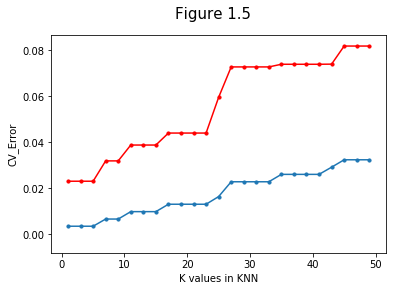

In [112]:
#plot the data points
### https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
fig = mp.figure()
mp.scatter(k_values,cv_errors_mean,s=10)
mp.plot(k_values,cv_errors_mean)
mp.scatter(k_values,conf_interval,s=10, color="red" )
mp.plot(k_values,conf_interval, color="red")

#specify the axes
mp.xlabel("K values in KNN")
mp.ylabel("CV_Error")

#Labeling the plot
#mp.legend(['1'])
#mp.legend(legends)
fig.suptitle('Figure 1.5', fontsize=15)

#display the current graph
show()

4c) the model that has the lowest 95% upper bound is for values of k = 1,3,5. This makes the model to overfit the data. As we have seen that for k=1, it is more likely to overfit the data. Even for the cases k=3,5 the variance is very large. So, this model overfits the data.

In [113]:
# create the model
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Declare Model
model = KNeighborsClassifier(n_neighbors=3)
# Fit model to our data
model.fit(simpleTrain,trainDigits)

# Lists to hold inpoints, predictions and assigned colors
xPred = []
yPred = []
cPred = []
# Use input points to get predictions here
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]])=="1.0"):
            cPred.append("b")
        else:
            cPred.append("r")

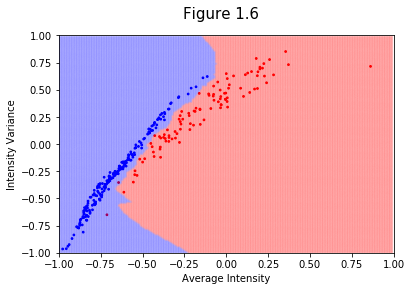

In [114]:
## Visualize Results
#plot the points
fig = mp.figure()
mp.scatter(X,Y,s=3,c=colors)

#plot the regions
mp.scatter(xPred,yPred,s=3,c=cPred,alpha=.1)

#setup the axes
mp.xlim(-1,1)
mp.xlabel("Average Intensity")
mp.ylim(-1,1)
mp.ylabel("Intensity Variance")

#Label the figure
fig.suptitle('Figure 1.6', fontsize=15)
show()

EXTRA CREDIT

For Wine Data Set, K has lowest optimal value which is k=7
https://archive.ics.uci.edu/ml/datasets/Wine

For Car Evaluation Data Set, K has highest optmal value which is k=16
http://archive.ics.uci.edu/ml/datasets/Car+Evaluation
